In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [15]:
titanic_df = pd.DataFrame(pd.read_excel('titanic.xls'))
titanic_df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


### Cleaning code

#### Fill the missing column Age

In [16]:
# checking all the null values per coulmn
titanic_df.isnull().sum()

# The result shows that age column has 263 missing values cabin has 1014, embarked has 2, boat has 823, body has 1188
# home.dest has 564 missing values

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [22]:
# replace missing age with the average value of age
# if we didnt put the inplace =True, then the change we made will not be reflected to the dataframe
titanic_df['age'].fillna(titanic_df['age'].mean(), inplace=True)
titanic_df.head(5)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


#### Combine sibsp and parch

('i', 0)
('i', 1)


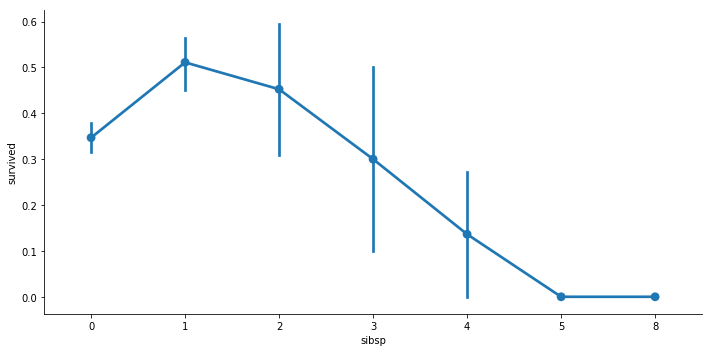

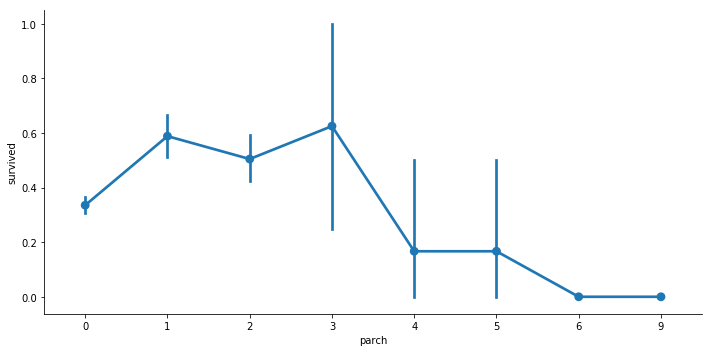

In [30]:
for i, col in enumerate(['sibsp', 'parch']):
    print('i', i)
#     plt.figure(i)
    sns.catplot(x=col, y='survived', data=titanic_df, kind='point', aspect=2)

In [31]:
# combining sibsp and parents
titanic_df['family_count'] = titanic_df['sibsp'] + titanic_df['parch']
titanic_df.head(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,family_count
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",0
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",3
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",3
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",3
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",3
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY",0
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY",1
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI",0
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY",2
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay",0


#### Drop unecessary columns

In [32]:
# Here we dropped sibsp and parch columns as we have merged both the coulmns to family_count
# axis=1 means that we have to drop the values columnwise and not row
# inplace = True means to make the changes
titanic_df.drop(['sibsp', 'parch'], axis=1, inplace=True)

In [34]:
titanic_df.head(10)

,pclass,survived,name,sex,age,ticket,fare,cabin,embarked,boat,body,home.dest,family_count
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,24160,211.3375,B5,S,2,NaN,"St Louis, MO",0
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",3
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",3
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",3
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",3
5,1,1,"Anderson, Mr. Harry",male,48.0000,19952,26.5500,E12,S,3,NaN,"New York, NY",0
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,13502,77.9583,D7,S,10,NaN,"Hudson, NY",1
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0000,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI",0
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY",2
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0000,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay",0


In [42]:
titanic_df.groupby(titanic_df['cabin'].isnull())['survived'].sum()

cabin
False    193
True     307
Name: survived, dtype: int64

In [43]:
# create a column cabin indicator where if the person has cabin show 1 and not show 0
titanic_df['cabin_indicator'] = np.where(titanic_df['cabin'].isnull(), 0, 1)
titanic_df.head(10)

,pclass,survived,name,sex,age,ticket,fare,cabin,embarked,boat,body,home.dest,family_count,cabin_indicator
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,24160,211.3375,B5,S,2,NaN,"St Louis, MO",0,1
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",3,1
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",3,1
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",3,1
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",3,1
5,1,1,"Anderson, Mr. Harry",male,48.0000,19952,26.5500,E12,S,3,NaN,"New York, NY",0,1
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,13502,77.9583,D7,S,10,NaN,"Hudson, NY",1,1
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0000,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI",0,1
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY",2,1
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0000,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay",0,0


In [44]:
#### convert sex variable to numeric
gender_num ={'male':0, 'female':1}
titanic_df['sex'] = titanic_df['sex'].map(gender_num)
titanic_df.head(10)

,pclass,survived,name,sex,age,ticket,fare,cabin,embarked,boat,body,home.dest,family_count,cabin_indicator
0,1,1,"Allen, Miss. Elisabeth Walton",1,29.0000,24160,211.3375,B5,S,2,NaN,"St Louis, MO",0,1
1,1,1,"Allison, Master. Hudson Trevor",0,0.9167,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",3,1
2,1,0,"Allison, Miss. Helen Loraine",1,2.0000,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",3,1
3,1,0,"Allison, Mr. Hudson Joshua Creighton",0,30.0000,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",3,1
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,25.0000,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",3,1
5,1,1,"Anderson, Mr. Harry",0,48.0000,19952,26.5500,E12,S,3,NaN,"New York, NY",0,1
6,1,1,"Andrews, Miss. Kornelia Theodosia",1,63.0000,13502,77.9583,D7,S,10,NaN,"Hudson, NY",1,1
7,1,0,"Andrews, Mr. Thomas Jr",0,39.0000,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI",0,1
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",1,53.0000,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY",2,1
9,1,0,"Artagaveytia, Mr. Ramon",0,71.0000,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay",0,0


#### drop unecessary variables

In [45]:
titanic_df.drop(['cabin', 'embarked', 'name', 'ticket'], axis=1, inplace=True)
titanic_df.head(10)

,pclass,survived,sex,age,fare,boat,body,home.dest,family_count,cabin_indicator
0,1,1,1,29.0000,211.3375,2,NaN,"St Louis, MO",0,1
1,1,1,0,0.9167,151.5500,11,NaN,"Montreal, PQ / Chesterville, ON",3,1
2,1,0,1,2.0000,151.5500,NaN,NaN,"Montreal, PQ / Chesterville, ON",3,1
3,1,0,0,30.0000,151.5500,NaN,135.0,"Montreal, PQ / Chesterville, ON",3,1
4,1,0,1,25.0000,151.5500,NaN,NaN,"Montreal, PQ / Chesterville, ON",3,1
5,1,1,0,48.0000,26.5500,3,NaN,"New York, NY",0,1
6,1,1,1,63.0000,77.9583,10,NaN,"Hudson, NY",1,1
7,1,0,0,39.0000,0.0000,NaN,NaN,"Belfast, NI",0,1
8,1,1,1,53.0000,51.4792,D,NaN,"Bayside, Queens, NY",2,1
9,1,0,0,71.0000,49.5042,NaN,22.0,"Montevideo, Uruguay",0,0


In [46]:
# write the new cleaned version of csv
titanic_df.to_csv('titanic_cleaned.csv')

### Split into train, test and validation set

In [51]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [59]:
titanic_df = pd.read_csv('titanic_cleaned.csv')
titanic_df.head(10)

,Unnamed: 0,pclass,survived,sex,age,fare,boat,body,home.dest,family_count,cabin_indicator
0,0,1,1,1,29.0000,211.3375,2,NaN,"St Louis, MO",0,1
1,1,1,1,0,0.9167,151.5500,11,NaN,"Montreal, PQ / Chesterville, ON",3,1
2,2,1,0,1,2.0000,151.5500,NaN,NaN,"Montreal, PQ / Chesterville, ON",3,1
3,3,1,0,0,30.0000,151.5500,NaN,135.0,"Montreal, PQ / Chesterville, ON",3,1
4,4,1,0,1,25.0000,151.5500,NaN,NaN,"Montreal, PQ / Chesterville, ON",3,1
5,5,1,1,0,48.0000,26.5500,3,NaN,"New York, NY",0,1
6,6,1,1,1,63.0000,77.9583,10,NaN,"Hudson, NY",1,1
7,7,1,0,0,39.0000,0.0000,NaN,NaN,"Belfast, NI",0,1
8,8,1,1,1,53.0000,51.4792,D,NaN,"Bayside, Queens, NY",2,1
9,9,1,0,0,71.0000,49.5042,NaN,22.0,"Montevideo, Uruguay",0,0


In [65]:
# drop the label(survived) from the csv file and assign it seperately
labels = titanic_df['survived']
features = titanic_df.drop(['survived'], axis=1)


In [69]:
# Here we are splitting the data such that 40% of data is for test and 60% for training
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.4, random_state=42)

# now again the above splitted data is again split among test and validation
# It is split such that out of the 40% of the test data, half is given to validation data(0.5)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)


#### Now the data is divided such that:
* 60% data -> train
* 20% data -> test
* 20% data -> validation

#### write out all data

In [70]:
# create separate csv file for features in X_train, X_test and X_val
X_train.to_csv('train_features.csv', index=False)
X_test.to_csv('test_features.csv', index=False)
X_val.to_csv('val_features.csv', index=False)

# create separate csv file for labels in y_train, y_test and y_val
y_train.to_csv('train_labels.csv', index=False)
y_test.to_csv('test_labels.csv', index=False)
y_val.to_csv('val_labels.csv', index=False)

/home/aifi/.local/lib/python2.7/site-packages/ipykernel_launcher.py:7: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  import sys
/home/aifi/.local/lib/python2.7/site-packages/ipykernel_launcher.py:8: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  
/home/aifi/.local/lib/python2.7/site-packages/ipykernel_launcher.py:9: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  if __name__ == '__main__':
